In [ ]:
## Step 1: IMPORT NECCESSARY LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import folium

pd.set_option('display.max_columns', 999)

In [ ]:
## Step 2: LOAD AND EXAMINE DATA
df = pd.read_csv("/content/credit_card_transactions.csv")

df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0,28705.00
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.18,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0,83236.00
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.23,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0,22844.00


In [ ]:
df.describe()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1100702.00
mean,648337.00,417192042079726656.00,70.35,48800.67,38.54,-90.23,88824.44,1349243636.73,38.54,-90.23,0.01,46825.75
std,374317.97,1308806447000789248.00,160.32,26893.22,5.08,13.76,301956.36,12841278.42,5.11,13.77,0.08,25834.00
min,0.00,60416207185.00,1.00,1257.00,20.03,-165.67,23.00,1325376018.00,19.03,-166.67,0.00,1001.00
25%,324168.50,180042946491150.00,9.65,26237.00,34.62,-96.80,743.00,1338750742.50,34.73,-96.90,0.00,25114.00
50%,648337.00,3521417320836166.00,47.52,48174.00,39.35,-87.48,2456.00,1349249747.00,39.37,-87.44,0.00,45860.00
75%,972505.50,4642255475285942.00,83.14,72042.00,41.94,-80.16,20328.00,1359385375.50,41.96,-80.24,0.00,68319.00
max,1296674.00,4992346398065154048.00,28948.90,99783.00,66.69,-67.95,2906700.00,1371816817.00,67.51,-66.95,1.00,99403.00


There are some fraud transaction in this dataset which has value in column 'is_fraud' equals 1 ==> should be remove


In [ ]:
df = df[df['is_fraud'] != 1]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1289169 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1289169 non-null  int64  
 1   trans_date_trans_time  1289169 non-null  object 
 2   cc_num                 1289169 non-null  int64  
 3   merchant               1289169 non-null  object 
 4   category               1289169 non-null  object 
 5   amt                    1289169 non-null  float64
 6   first                  1289169 non-null  object 
 7   last                   1289169 non-null  object 
 8   gender                 1289169 non-null  object 
 9   street                 1289169 non-null  object 
 10  city                   1289169 non-null  object 
 11  state                  1289169 non-null  object 
 12  zip                    1289169 non-null  int64  
 13  lat                    1289169 non-null  float64
 14  long                   

In [ ]:
## Step 3: FFILTERING AND CREATING NECCESSARY DATAFRAMES

# Drop unecccessary columns
columns_to_drop = ['Unnamed: 0', 'merch_zipcode', 'is_fraud',  'unix_time',  'zip', 'street', 'merchant', 'first', 'last','job']
df_cluster = df.drop(columns=columns_to_drop, axis=1)

# Calculate age and create a new column

df_cluster['dob'] = pd.to_datetime(df_cluster['dob'])
examination_date = pd.to_datetime('2021-01-01')
df_cluster['age'] = (examination_date - df_cluster['dob']).dt.days // 365.25
df_cluster.drop(['dob'], axis = 1, inplace = True)

In [ ]:
df_cluster.dropna(inplace = True)

In [ ]:
df_cluster.describe(include = 'object')

,trans_date_trans_time,category,gender,city,state,trans_num
count,1289169,1289169,1289169,1289169,1289169,1289169
unique,1267522,14,2,836,50,1289169
top,2020-06-01 01:37:47,gas_transport,F,Birmingham,TX,8f7c8e4ab7f25875d753b422917c98c9
freq,4,131041,706128,5606,94397,1


In [ ]:
df_cluster.describe()

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,age
count,1289169.00,1289169.00,1289169.00,1289169.00,1289169.00,1289169.00,1289169.00,1289169.00
mean,417290057695872768.00,67.67,38.54,-90.23,88775.23,38.54,-90.23,46.73
std,1308989951701786880.00,154.01,5.08,13.76,301806.55,5.11,13.77,17.37
min,60416207185.00,1.00,20.03,-165.67,23.00,19.03,-166.67,15.00
25%,180042946491150.00,9.61,34.62,-96.80,743.00,34.73,-96.90,33.00
50%,3521417320836166.00,47.28,39.35,-87.48,2456.00,39.37,-87.44,45.00
75%,4642255475285942.00,82.54,41.94,-80.16,20328.00,41.96,-80.24,58.00
max,4992346398065154048.00,28948.90,65.69,-67.95,2906700.00,66.68,-66.95,96.00


In [ ]:
df_cluster.head(10)

,trans_date_trans_time,cc_num,category,amt,gender,city,state,lat,long,city_pop,trans_num,merch_lat,merch_long,age
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,Moravian Falls,NC,36.08,-81.18,3495,0b242abb623afc578575680df30655b9,36.01,-82.05,32.00
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,Orient,WA,48.89,-118.21,149,1f76529f8574734946361c461b024d99,49.16,-118.19,42.00
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,Malad City,ID,42.18,-112.26,4154,a1a22d70485983eac12b5b88dad1cf95,43.15,-112.15,58.00
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,Boulder,MT,46.23,-112.11,1939,6b849c168bdad6f867558c3793159a81,47.03,-112.56,53.00
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,Doe Hill,VA,38.42,-79.46,99,a41d7549acf90789359a9aa5346dcb46,38.67,-78.63,34.00
5,2019-01-01 00:04:08,4767265376804500,gas_transport,94.63,F,Dublin,PA,40.38,-75.20,2158,189a841a0a8ba03058526bcfe566aab5,40.65,-76.15,59.00
6,2019-01-01 00:04:42,30074693890476,grocery_net,44.54,F,Holcomb,KS,37.99,-100.99,2691,83ec1cc84142af6e2acf10c44949e720,37.16,-100.15,27.00
7,2019-01-01 00:05:08,6011360759745864,gas_transport,71.65,M,Edinburg,VA,38.84,-78.60,6018,6d294ed2cc447d2c71c7171a3d54967c,38.95,-78.54,73.00
8,2019-01-01 00:05:18,4922710831011201,misc_pos,4.27,F,Manor,PA,40.34,-79.66,1472,fc28024ce480f8ef21a32d64c93a29f5,40.35,-79.96,79.00
9,2019-01-01 00:06:01,2720830304681674,grocery_pos,198.39,F,Clarksville,TN,36.52,-87.35,151785,3b9014ea8fb80bd65de0b1463b00b00e,37.18,-87.49,46.00


In [ ]:
# Creating RFM dataset for clustering

In [ ]:
distinct_cc_num_count = df_cluster['merch_long'].nunique()
print(f"Number of distinct cc_num values: {distinct_cc_num_count}")

Number of distinct cc_num values: 1268482


In [ ]:
customer_df = df_cluster.groupby('cc_num', as_index = False).agg(Monetary= ('amt', 'sum'),
                                                            Frequency=('trans_num','nunique'),
                                                            RecentDate=('trans_date_trans_time','max'),
                                                            Age=('age','mean'),
                                                            city_pop =('city_pop', 'mean'),
                                                            lat = ('lat', 'first'),
                                                            long = ('long', 'first'),
                                                            merch_lat = ('merch_lat', 'first'),
                                                            merch_long = ('merch_long', 'first'),
                                                            category = ('category', 'first'),
                                                            gender = ('gender', 'first'),
                                                            city= ('city', 'first'),
                                                            state = ('state', 'first')


                                                            )




customer_df.describe()

,cc_num,Monetary,Frequency,Age,city_pop,lat,long,merch_lat,merch_long
count,908.00,908.00,908.00,908.00,908.00,908.00,908.00,908.00,908.00
mean,409032839440909760.00,96073.06,1419.79,49.23,89891.77,38.60,-90.19,38.59,-90.20
std,1293983088879635712.00,56457.02,748.94,17.97,292420.68,5.06,13.89,5.09,13.92
min,60416207185.00,22273.80,469.00,15.00,23.00,20.03,-165.67,19.21,-166.15
25%,180039134824213.00,52639.17,986.75,34.00,759.75,34.86,-96.74,34.85,-96.69
50%,3521616268463870.00,90121.01,1505.50,48.00,2470.50,39.44,-87.47,39.36,-87.42
75%,4651725118009860.00,125669.50,2027.25,61.00,19477.25,42.07,-80.26,41.94,-80.20
max,4992346398065154048.00,296436.73,3123.00,96.00,2906700.00,65.69,-67.95,65.56,-68.52


In [ ]:
customer_df['Recency'] = (pd.to_datetime('2021-01-01') - pd.to_datetime(customer_df['RecentDate'])).dt.days
customer_df.drop(columns = ['RecentDate'], axis =1, inplace = True)

In [ ]:
customer_df.head()

,cc_num,Monetary,Frequency,Age,city_pop,lat,long,merch_lat,merch_long,category,gender,city,state,Recency
0,60416207185,83143.74,1509,34.00,1645.00,43.00,-108.90,43.97,-109.74,misc_net,F,Fort Washakie,WY,193
1,60422928733,98140.02,1519,78.00,46944.00,33.60,-81.97,32.83,-82.27,home,M,North Augusta,SC,193
2,60423098130,54075.55,500,62.00,83.00,36.94,-98.25,36.74,-99.03,misc_net,M,Amorita,OK,195
3,60427851591,49483.82,514,44.00,2142.00,35.35,-99.19,35.08,-99.76,grocery_pos,M,Burns Flat,OK,195
4,60487002085,25160.11,496,48.00,233060.00,32.37,-90.13,31.87,-90.20,misc_net,M,Jackson,MS,194


In [ ]:
rfm_df = customer_df.drop(columns = ['merch_lat', 'merch_long', 'category', 'gender', 'city', 'state'])

In [ ]:
rfm_df

,cc_num,Monetary,Frequency,Age,city_pop,lat,long,Recency
0,60416207185,83143.74,1509,34.00,1645.00,43.00,-108.90,193
1,60422928733,98140.02,1519,78.00,46944.00,33.60,-81.97,193
2,60423098130,54075.55,500,62.00,83.00,36.94,-98.25,195
3,60427851591,49483.82,514,44.00,2142.00,35.35,-99.19,195
4,60487002085,25160.11,496,48.00,233060.00,32.37,-90.13,194
...,...,...,...,...,...,...,...,...
903,4958589671582726883,97973.69,1476,70.00,43102.00,38.79,-77.28,193
904,4973530368125489546,76137.15,1030,55.00,2786.00,35.83,-94.12,193
905,4980323467523543940,32392.03,522,73.00,1966.00,44.10,-72.02,194
906,4989847570577635369,88195.62,1007,26.00,8333.00,34.18,-81.53,193


<ipython-input-44-e62da18ec434>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=rfm_df, x=numerical_cols[i-1],bins = 15, palette ="Blues_d", kde = True)
<ipython-input-44-e62da18ec434>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=rfm_df, x=numerical_cols[i-1],bins = 15, palette ="Blues_d", kde = True)
<ipython-input-44-e62da18ec434>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=rfm_df, x=numerical_cols[i-1],bins = 15, palette ="Blues_d", kde = True)
<ipython-input-44-e62da18ec434>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=rfm_df, x=numerical_cols[i-1],bins = 15, palette ="Blues_d", kde = True)
<ipython-input-44-e62da18ec434>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=rfm_df, x=numerical_col

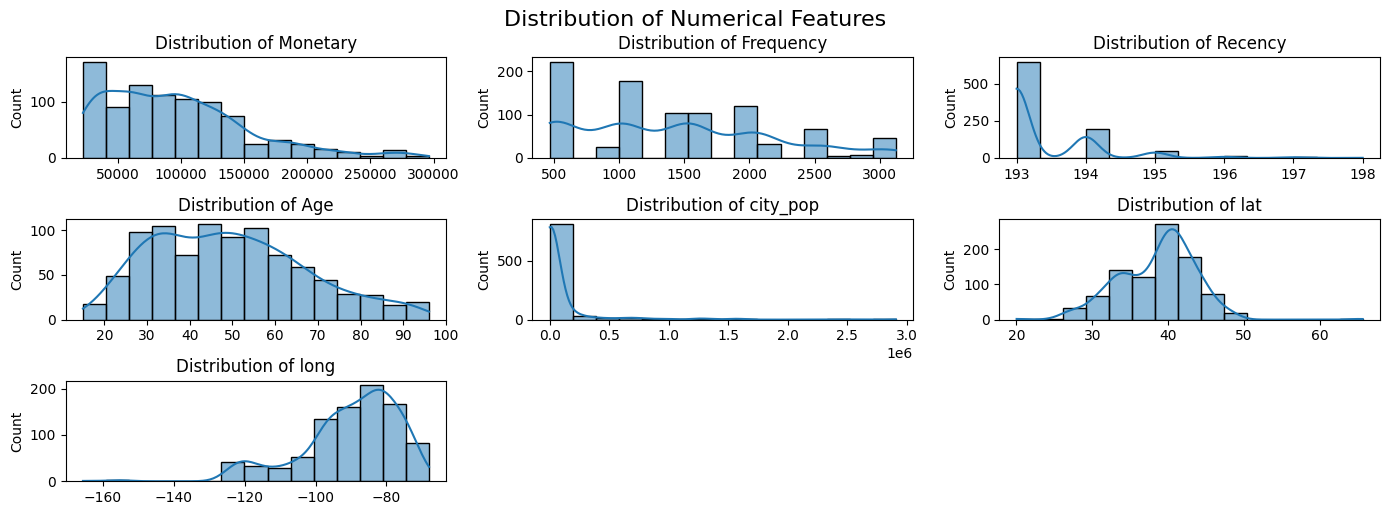

In [ ]:
# Exploratory Data Analysis of rfm_df
numerical_cols = ['Monetary', 'Frequency', 'Recency', 'Age', 'city_pop', 'lat', 'long']
plt.figure(figsize=(14, 5))
for i in range(1,8):
    plt.subplot(3, 3, i)
    ax = sns.histplot(data=rfm_df, x=numerical_cols[i-1],bins = 15, palette ="Blues_d", kde = True)
    plt.title(f"Distribution of {numerical_cols[i-1]}")
    plt.xlabel("")
plt.tight_layout()
plt.suptitle("Distribution of Numerical Features", fontsize=16, y=1.02)
plt.show()

<ipython-input-46-264fbb6d9f55>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=rfm_df[numerical_cols[i-1]], palette ="Blues_d")
<ipython-input-46-264fbb6d9f55>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=rfm_df[numerical_cols[i-1]], palette ="Blues_d")
<ipython-input-46-264fbb6d9f55>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=rfm_df[numerical_cols[i-1]], palette ="Blues_d")
<ipython-input-46-264fbb6d9f55>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

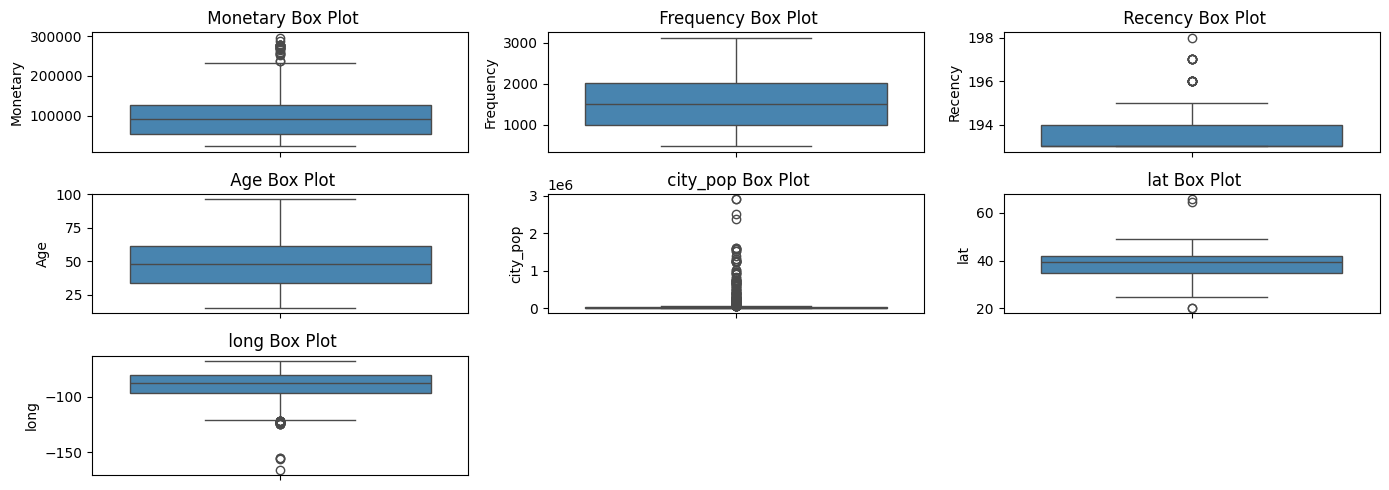

In [ ]:
plt.figure(figsize=(14, 5))
for i in range(1,8):
    plt.subplot(3, 3, i)
    ax = sns.boxplot(data=rfm_df[numerical_cols[i-1]], palette ="Blues_d")
    plt.title(f" {numerical_cols[i-1]} Box Plot")
    plt.xlabel("")
plt.tight_layout()
plt.show()


we can see that the city_pop Box plot is too skew, showing that most of our customers come from city with small population ==> we would not examine this column

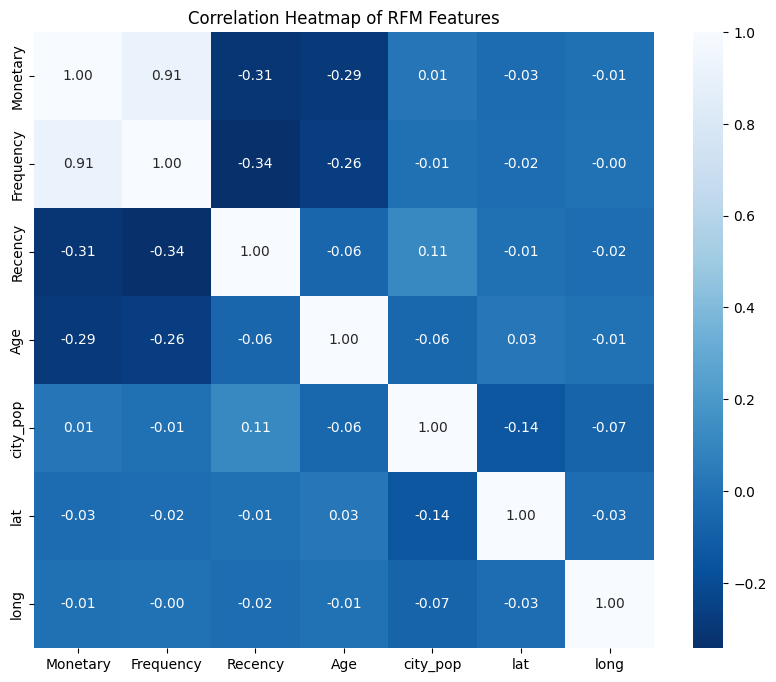

In [ ]:
corr_matrix = rfm_df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues_r', fmt=".2f")
plt.title('Correlation Heatmap of RFM Features')
plt.show()

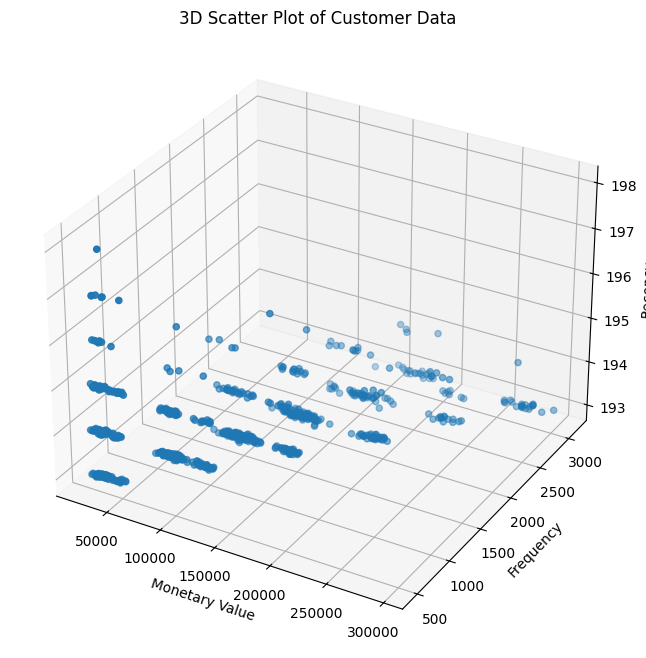

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(rfm_df["Monetary"], rfm_df["Frequency"], rfm_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [ ]:
## Step 4: SCALING DATA AND CLUSTERING

# Scaling data for clustering
rfm_for_scaled = rfm_df.drop(columns = ['cc_num', 'city_pop'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rfm_for_scaled)
scaled_data_df = pd.DataFrame(scaled_data, columns=rfm_for_scaled.columns, index=rfm_df.index)
scaled_data_df

,Monetary,Frequency,Age,lat,long,Recency
0,-0.23,0.12,-0.85,0.87,-1.35,-0.54
1,0.04,0.13,1.60,-0.99,0.59,-0.54
2,-0.74,-1.23,0.71,-0.33,-0.58,2.24
3,-0.83,-1.21,-0.29,-0.64,-0.65,2.24
4,-1.26,-1.23,-0.07,-1.23,0.00,0.85
...,...,...,...,...,...,...
903,0.03,0.08,1.16,0.04,0.93,-0.54
904,-0.35,-0.52,0.32,-0.55,-0.28,-0.54
905,-1.13,-1.20,1.32,1.09,1.31,0.85
906,-0.14,-0.55,-1.29,-0.87,0.62,-0.54


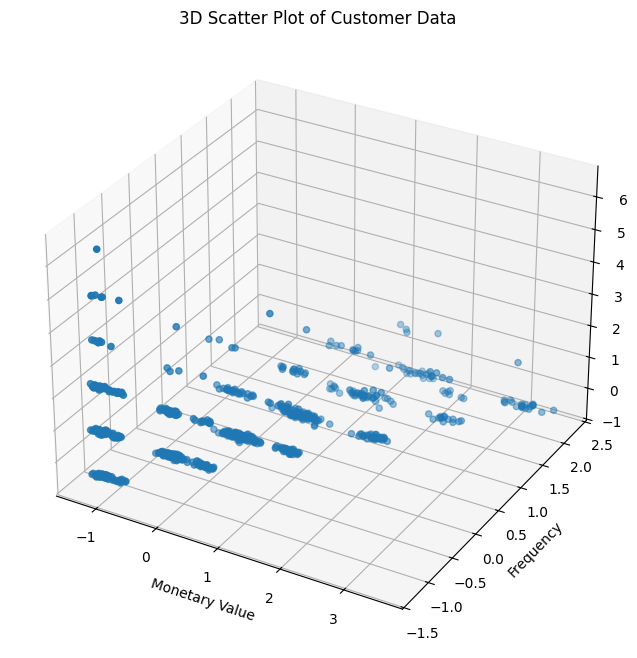

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["Monetary"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

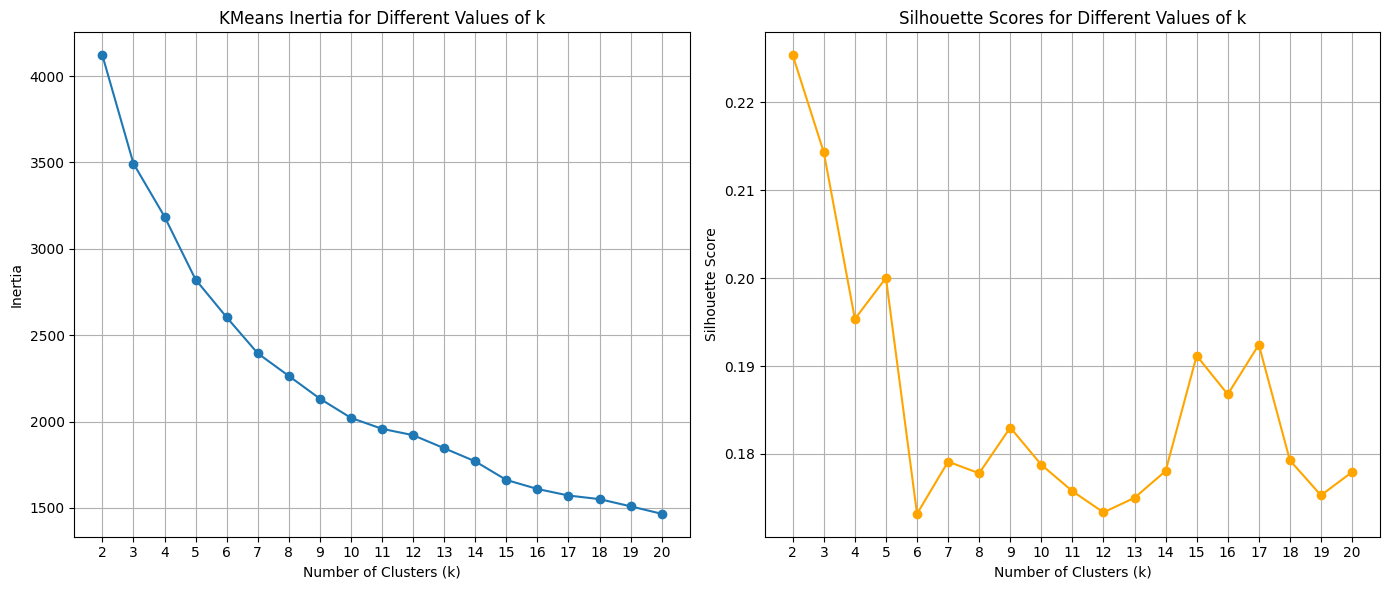

In [ ]:
# Finding the best k using Elbow and Silhouete
max_k = 20

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

upon the graphs, we decide the best k equals 2

In [ ]:
# Fit the model
kmeans = KMeans(n_clusters=2, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
rfm_df["Cluster"] = cluster_labels

distinct_cc_num_counts =rfm_df['cc_num'].nunique()
print(f"Number of distinct cc_num values: {distinct_cc_num_counts}")
rfm_df.head()

Number of distinct cc_num values: 908


,cc_num,Monetary,Frequency,Age,city_pop,lat,long,Recency,Cluster
0,60416207185,83143.74,1509,34.00,1645.00,43.00,-108.90,193,1
1,60422928733,98140.02,1519,78.00,46944.00,33.60,-81.97,193,1
2,60423098130,54075.55,500,62.00,83.00,36.94,-98.25,195,1
3,60427851591,49483.82,514,44.00,2142.00,35.35,-99.19,195,1
4,60487002085,25160.11,496,48.00,233060.00,32.37,-90.13,194,1


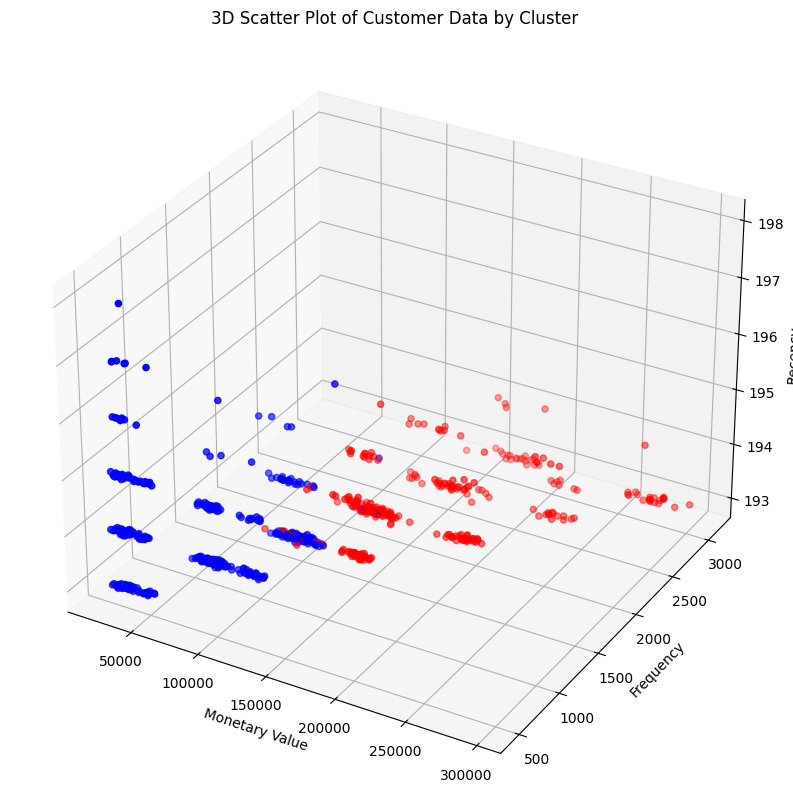

In [ ]:
cluster_color_mapping = {
    0: 'red',
    1: 'blue'
}

colors = rfm_df['Cluster'].map(cluster_color_mapping)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(rfm_df['Monetary'],
                     rfm_df['Frequency'],
                   rfm_df['Recency'],
                     c=colors,
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

In [ ]:
# Final dataframe of segmented customer
df_cluster = customer_df.merge(
    rfm_df[['cc_num', 'Cluster']],
    on='cc_num',
    how='left'
)

In [ ]:
df_cluster.head(10)

,cc_num,Monetary,Frequency,Age,city_pop,lat,long,merch_lat,merch_long,category,gender,city,state,Recency,Cluster
0,60416207185,83143.74,1509,34.00,1645.00,43.00,-108.90,43.97,-109.74,misc_net,F,Fort Washakie,WY,193,1
1,60422928733,98140.02,1519,78.00,46944.00,33.60,-81.97,32.83,-82.27,home,M,North Augusta,SC,193,1
2,60423098130,54075.55,500,62.00,83.00,36.94,-98.25,36.74,-99.03,misc_net,M,Amorita,OK,195,1
3,60427851591,49483.82,514,44.00,2142.00,35.35,-99.19,35.08,-99.76,grocery_pos,M,Burns Flat,OK,195,1
4,60487002085,25160.11,496,48.00,233060.00,32.37,-90.13,31.87,-90.20,misc_net,M,Jackson,MS,194,1
5,60490596305,67535.97,1000,57.00,222.00,34.88,-90.77,34.45,-90.84,entertainment,F,Haynes,AR,194,1
6,60495593109,29523.69,518,78.00,1263321.00,32.77,-96.74,32.28,-97.46,food_dining,M,Dallas,TX,193,1
7,501802953619,101855.91,1552,62.00,308.00,41.54,-122.94,41.01,-122.40,misc_net,M,Greenview,CA,193,1
8,501828204849,32811.85,507,62.00,602.00,37.16,-96.69,37.55,-95.77,shopping_net,F,Dexter,KS,194,1
9,501831082224,58975.92,1018,58.00,1762.00,40.95,-78.31,40.97,-78.24,shopping_net,M,West Decatur,PA,193,1


In [ ]:
df_cluster.describe()

,cc_num,Monetary,Frequency,Age,city_pop,lat,long,merch_lat,merch_long,Recency,Cluster
count,908.00,908.00,908.00,908.00,908.00,908.00,908.00,908.00,908.00,908.00,908.00
mean,409032839440909760.00,96073.06,1419.79,49.23,89891.77,38.60,-90.19,38.59,-90.20,193.39,0.63
std,1293983088879635712.00,56457.02,748.94,17.97,292420.68,5.06,13.89,5.09,13.92,0.72,0.48
min,60416207185.00,22273.80,469.00,15.00,23.00,20.03,-165.67,19.21,-166.15,193.00,0.00
25%,180039134824213.00,52639.17,986.75,34.00,759.75,34.86,-96.74,34.85,-96.69,193.00,0.00
50%,3521616268463870.00,90121.01,1505.50,48.00,2470.50,39.44,-87.47,39.36,-87.42,193.00,1.00
75%,4651725118009860.00,125669.50,2027.25,61.00,19477.25,42.07,-80.26,41.94,-80.20,194.00,1.00
max,4992346398065154048.00,296436.73,3123.00,96.00,2906700.00,65.69,-67.95,65.56,-68.52,198.00,1.00


In [ ]:
df_cluster.groupby('Cluster')[['Monetary', 'Frequency', 'Age', 'city_pop', 'Recency']].mean()

,Monetary,Frequency,Age,city_pop,Recency
Cluster,,,,,
0,153517.26,2204.15,40.68,98952.03,193.16
1,62009.66,954.68,54.30,84519.19,193.53


<ipython-input-85-e1b1737b00df>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




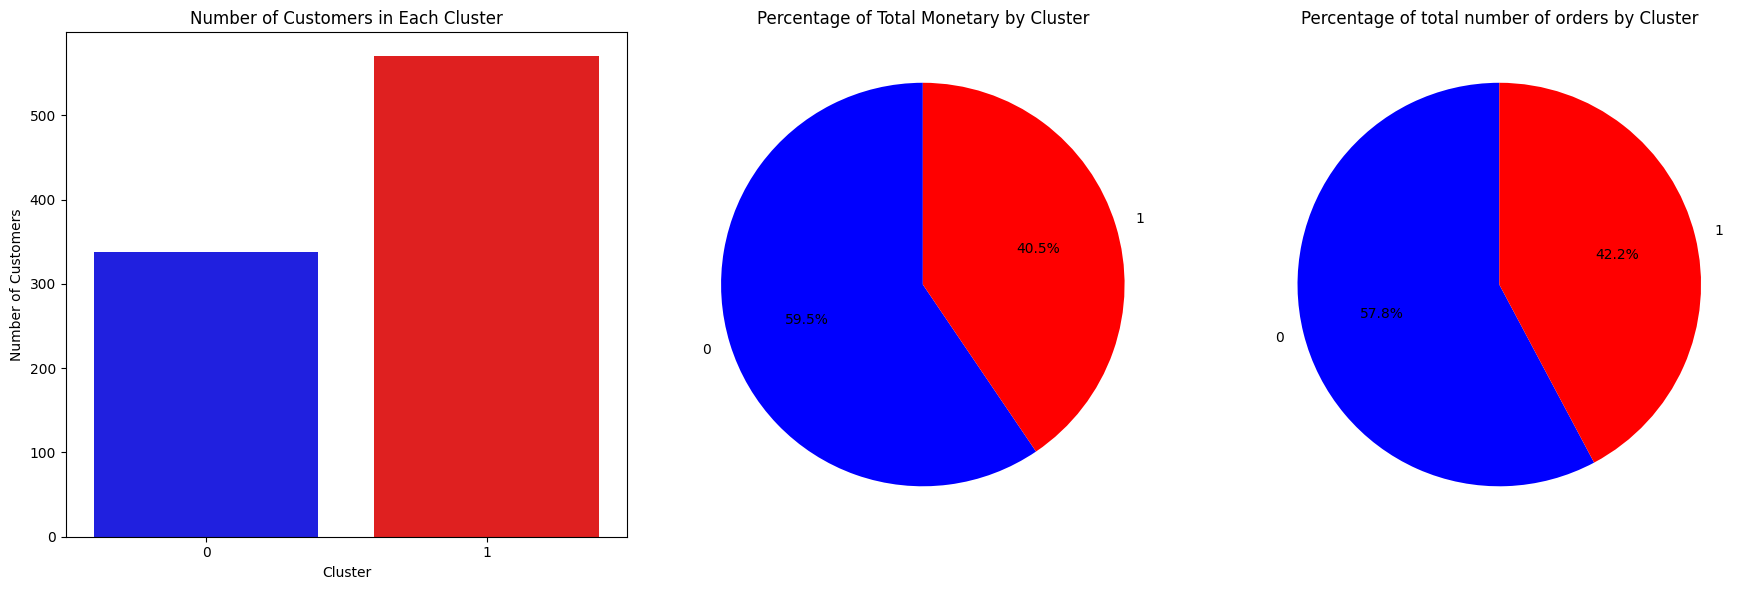

In [ ]:
# Step 5: PROFILING CUSTOMER


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Chart 1: Count of cluster
sns.countplot(x='Cluster', data=df_cluster, ax=axes[0], palette={'0': 'blue', '1': 'red'})
axes[0].set_title('Number of Customers in Each Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Number of Customers')

# Chart 2: Pie chart (Monetary)
cluster_monetary = df_cluster.groupby('Cluster')['Monetary'].sum()
total_monetary = df_cluster['Monetary'].sum()
cluster_percentage = (cluster_monetary / total_monetary) * 100
axes[1].pie(cluster_percentage, labels=cluster_percentage.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
axes[1].set_title('Percentage of Total Monetary by Cluster')

# Chart 3: Pie chart (Frequency)
cluster_frequency = df_cluster.groupby('Cluster')['Frequency'].sum()
total_frequency = df_cluster['Frequency'].sum()
cluster_percentage = (cluster_frequency / total_frequency) * 100
axes[2].pie(cluster_percentage, labels=cluster_percentage.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
axes[2].set_title('Percentage of total number of orders by Cluster')

plt.tight_layout()
plt.show()

the graphs show that despite accounting for only about 30% of the total number of customers, the cluster 0 dominates with nearly 60% of both total amount of transaction and number of orders

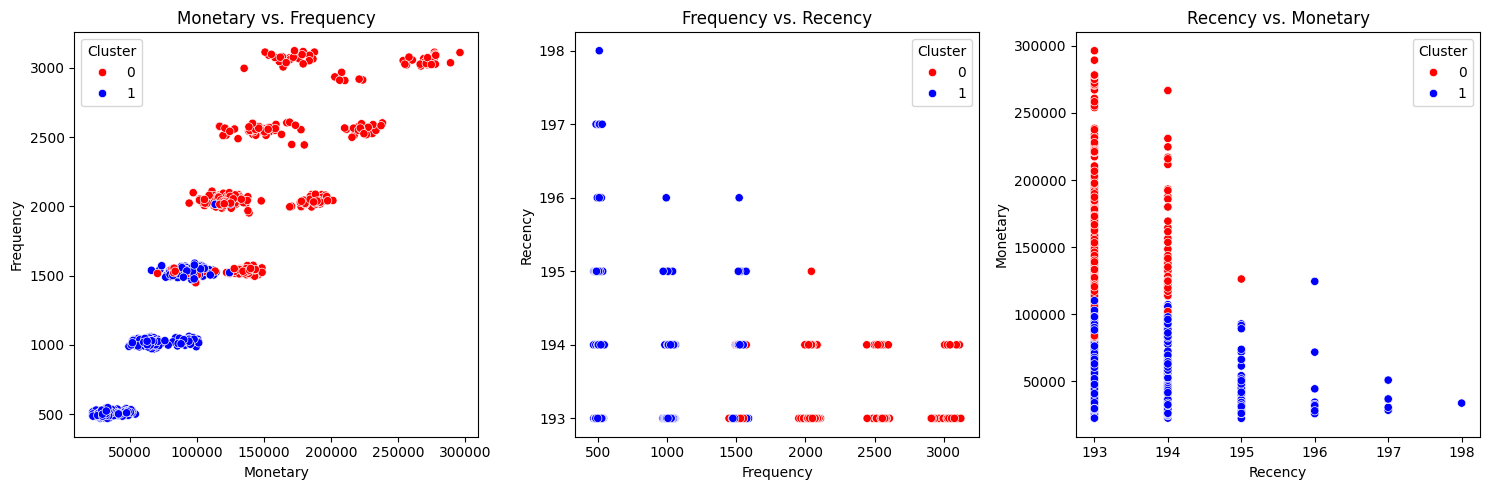

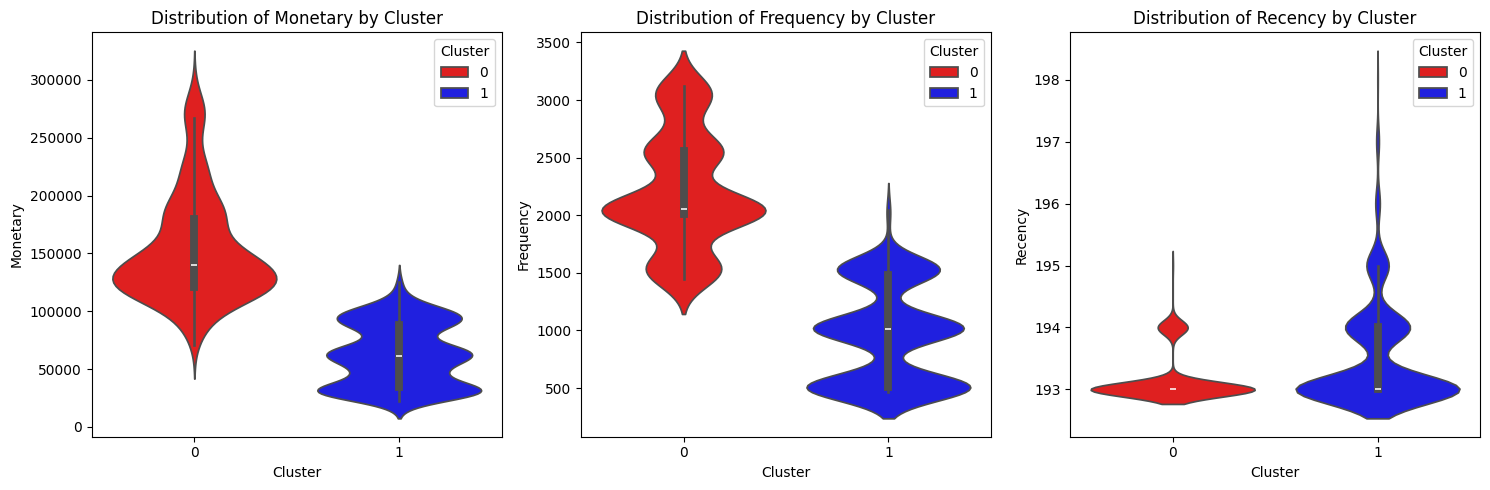

In [ ]:
cluster_color_mapping = {
    0: 'red',
    1: 'blue'
}


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatterplot 1: Monetary vs. Frequency
sns.scatterplot(x='Monetary', y='Frequency', hue='Cluster', data=df_cluster, palette=cluster_color_mapping, ax=axes[0])
axes[0].set_title('Monetary vs. Frequency')

# Scatterplot 2: Frequency vs. Recency
sns.scatterplot(x='Frequency', y='Recency', hue='Cluster', data=df_cluster, palette=cluster_color_mapping, ax=axes[1])
axes[1].set_title('Frequency vs. Recency')

# Scatterplot 3: Recency vs. Monetary
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=df_cluster, palette=cluster_color_mapping, ax=axes[2])
axes[2].set_title('Recency vs. Monetary')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()




fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Violin plot 1: Monetary
sns.violinplot(x='Cluster', y='Monetary', data=df_cluster, hue='Cluster', palette=cluster_color_mapping, ax=axes[0])
axes[0].set_title('Distribution of Monetary by Cluster')

# Violin plot 2: Frequency
sns.violinplot(x='Cluster', y='Frequency', data=df_cluster, hue='Cluster', palette=cluster_color_mapping, ax=axes[1])
axes[1].set_title('Distribution of Frequency by Cluster')

# Violin plot 3: Recency
sns.violinplot(x='Cluster', y='Recency', data=df_cluster, hue='Cluster', palette=cluster_color_mapping, ax=axes[2])
axes[2].set_title('Distribution of Recency by Cluster')

plt.tight_layout()
plt.show()

- Cluster 0 also has higher mean of amount of transaction (about 140,000 compared to 60,000 of cluster 1), and higher mean of number of orders ( about 2000 per each compared to 1000 per each of cluster 1).
- Both cluster has the same mean of recency. However, the cluster 1 also has some values over 195 days.

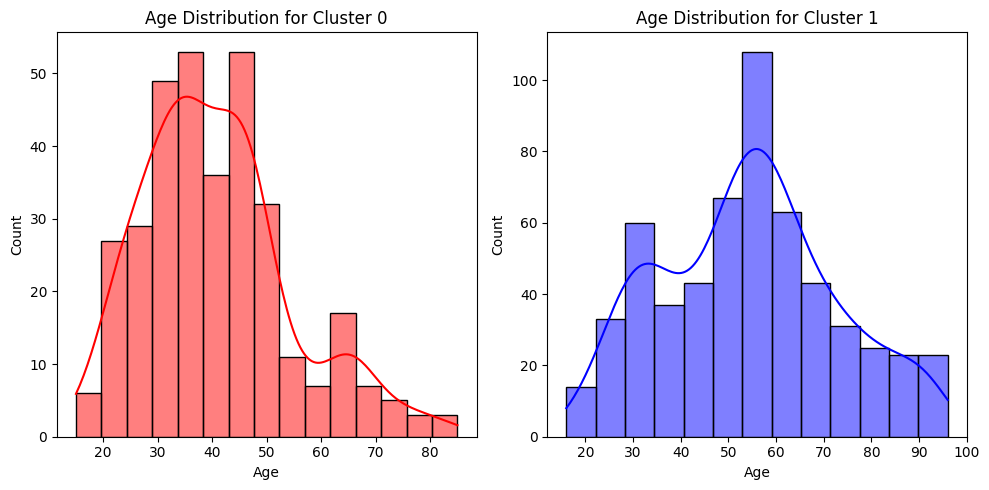

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histogram 1: Cluster 0
sns.histplot(df_cluster[df_cluster['Cluster'] == 0]['Age'], color=cluster_color_mapping[0], kde=True,  ax=axes[0])
axes[0].set_title('Age Distribution for Cluster 0')

# Histogram 2: Cluster 1
sns.histplot(df_cluster[df_cluster['Cluster'] == 1]['Age'], color=cluster_color_mapping[1], kde = True, ax=axes[1])
axes[1].set_title('Age Distribution for Cluster 1')

plt.tight_layout()
plt.show()

the difference is not too clear but most of the customers in cluster 0 gather around 30-50 while the cluster 1 mostly gather around 50-70

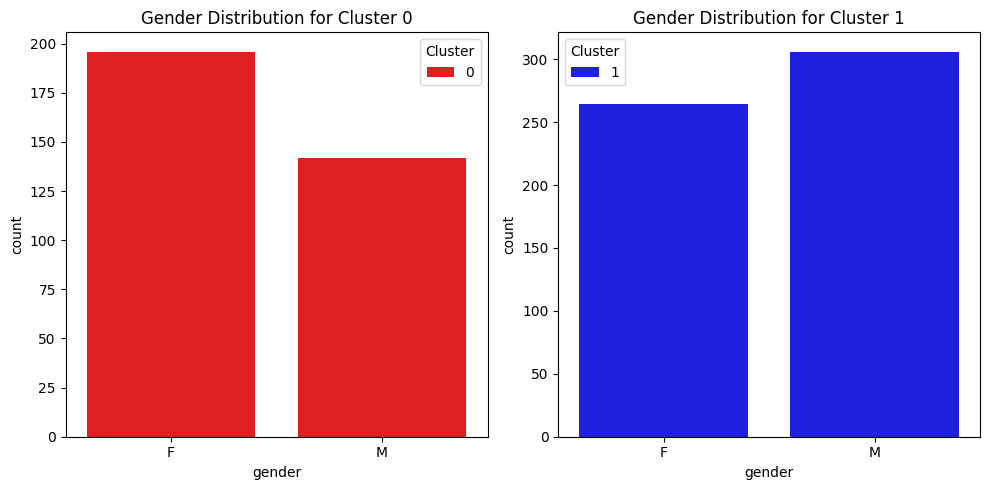

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Countplot 1: Cluster 0 by gender
sns.countplot(x='gender', hue='Cluster', data=df_cluster[df_cluster['Cluster'] == 0], palette=cluster_color_mapping, ax=axes[0])
axes[0].set_title('Gender Distribution for Cluster 0')

# Countplot 2: Cluster 1 by gender
sns.countplot(x='gender', hue='Cluster', data=df_cluster[df_cluster['Cluster'] == 1], palette=cluster_color_mapping, ax=axes[1])
axes[1].set_title('Gender Distribution for Cluster 1')

plt.tight_layout()
plt.show()


<ipython-input-61-8bd426bf4e9f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=df_cluster[df_cluster['Cluster'] == 0],
<ipython-input-61-8bd426bf4e9f>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=df_cluster[df_cluster['Cluster'] == 1],


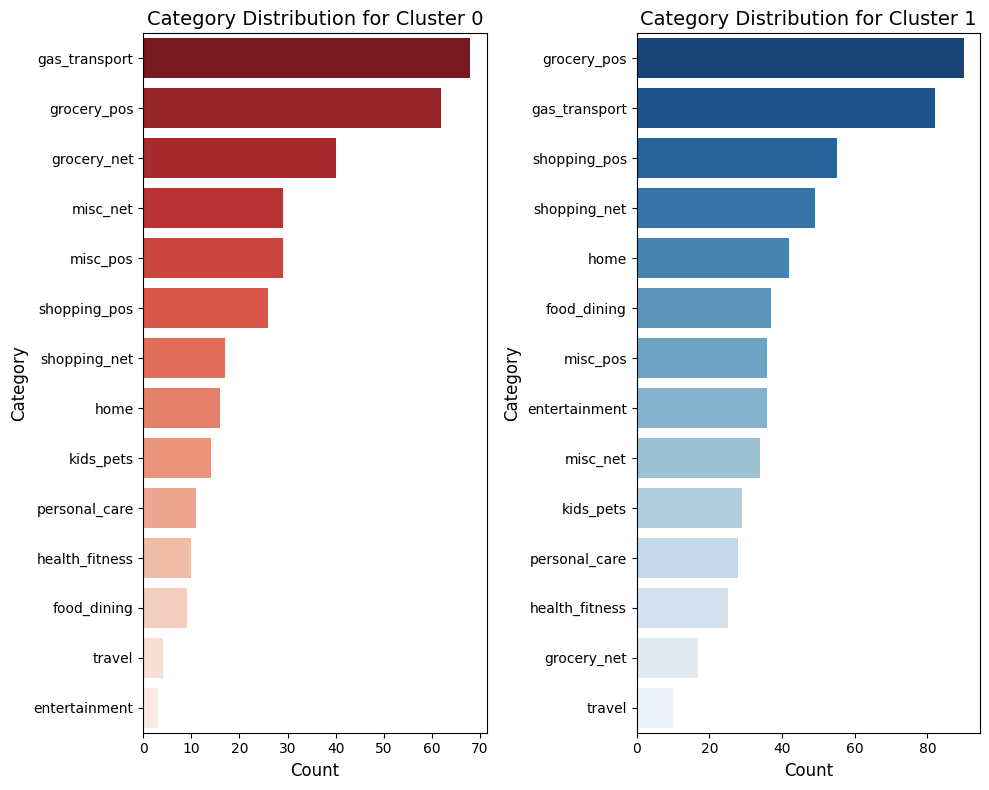

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

# Bar plot 1: Cluster 0 by category
category_counts_0 = df_cluster[df_cluster['Cluster'] == 0]['category'].value_counts()
categories_0 = category_counts_0.index
sns.countplot(y='category', data=df_cluster[df_cluster['Cluster'] == 0],
              palette='Reds_r', ax=axes[0], order=categories_0)
axes[0].set_title('Category Distribution for Cluster 0', fontsize=14)
axes[0].set_xlabel('Count', fontsize=12)
axes[0].set_ylabel('Category', fontsize=12)

# Bar plot 2: Cluster 1 by category
category_counts_1 = df_cluster[df_cluster['Cluster'] == 1]['category'].value_counts()
categories_1 = category_counts_1.index
sns.countplot(y='category', data=df_cluster[df_cluster['Cluster'] == 1],
              palette='Blues_r', ax=axes[1], order=categories_1)
axes[1].set_title('Category Distribution for Cluster 1', fontsize=14)
axes[1].set_xlabel('Count', fontsize=12)
axes[1].set_ylabel('Category', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-98-7353bb0e08b1>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-98-7353bb0e08b1>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




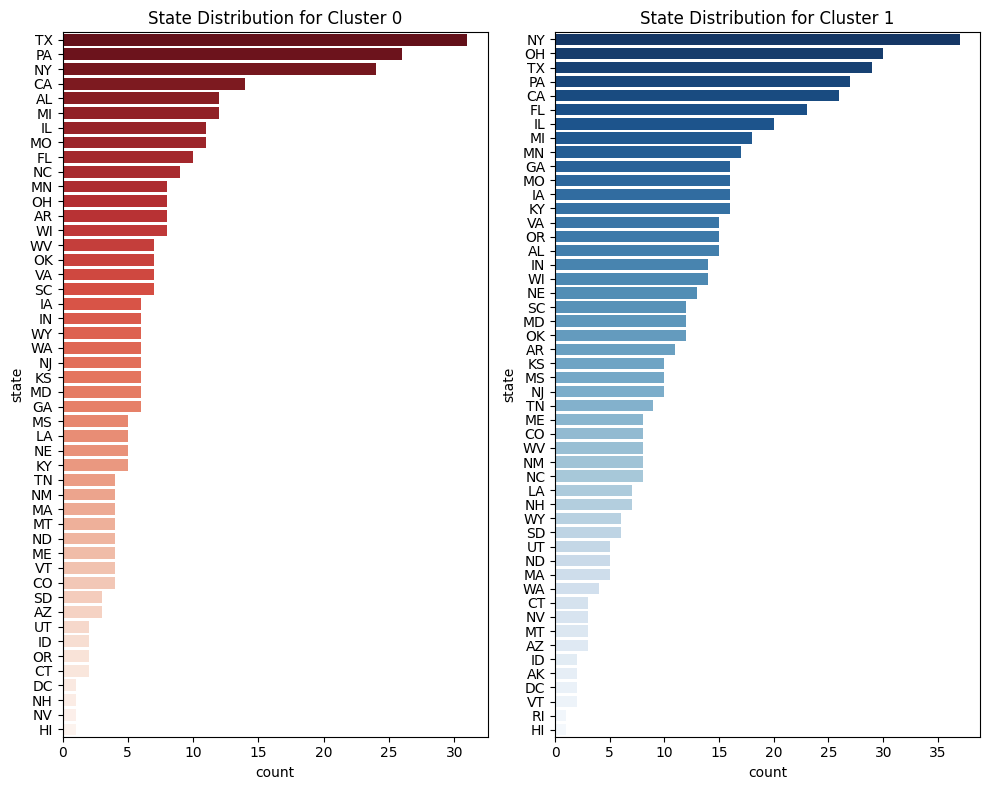

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

# Chart 1: Cluster 0 by state
sns.countplot(y='state', data=df_cluster[df_cluster['Cluster'] == 0],
              order=df_cluster[df_cluster['Cluster'] == 0]['state'].value_counts().index, palette = 'Reds_r',
              ax=axes[0])
axes[0].set_title('State Distribution for Cluster 0')

# Chart 2: CLuster 1 by state
sns.countplot(y='state', data=df_cluster[df_cluster['Cluster'] == 1],
              order=df_cluster[df_cluster['Cluster'] == 1]['state'].value_counts().index, palette = "Blues_r", ax=axes[1])
axes[1].set_title('State Distribution for Cluster 1')

plt.tight_layout()
plt.show()

In [ ]:
# Examnine longitude and latitude of each cluster
map_clusters = folium.Map(location=[39.5, -98.35], zoom_start=4)
colors = {0: 'red', 1: 'blue'}
for _, row in df_cluster.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=4,
        color=colors.get(row['Cluster'], 'gray'),
        fill=True,
        fill_color=colors.get(row['Cluster'], 'gray'),
        fill_opacity=0.6,
    ).add_to(map_clusters)
map_clusters

In [ ]:
# Examnine merch_long and merch_lat of each cluster
map_clusters = folium.Map(location=[39.5, -98.35], zoom_start=4)
colors = {0: 'red', 1: 'blue'}
for _, row in df_cluster.iterrows():
    folium.CircleMarker(
        location=[row['merch_lat'], row['merch_long']],
        radius=4,
        color=colors.get(row['Cluster'], 'gray'),
        fill=True,
        fill_color=colors.get(row['Cluster'], 'gray'),
        fill_opacity=0.6,
    ).add_to(map_clusters)
map_clusters

In [ ]:
### Conclusion:
## Cluster 0: contains younger customers with high transaction amount and usually using credit card payment method.
# accounts for 30% of total customers but creates about 60% of total transaction value and number of orders
# concentrate around the age of 30 to 50
## Cluster 1: contains older customers with lower transaction value and frequency of using the credit card